# Python e API

### O que é uma API?

- É um conjunto de códigos para usar um serviço/site/aplicativo específico. Cada site/ferramenta tem sua própria API. É importante que você saiba ler as APIs que precisar para saber usar

- Um dos padrões mais comuns em API é pegar informações em formato json, uma espécie de dicionário que precisa ser tratada no Python para podermos analisar

- As possibilidades de API são infinitas, vamos fazer 2 exemplos aqui: Cotação de Moedas e Envio de SMS.

- Sites como Google, Youtube, Facebook, Twitter, ArcGis e praticamente qualquer ferramenta/site grande tem uma API.

### O que precisamos:

- Quase sempre você precisa de uma conta para consumir uma API. Algumas APIs são abertas, como a https://docs.awesomeapi.com.br/api-de-moedas , mas em muitos casos (como veremos no caso do SMS) vamos precisar ter uma conta ativa para consumir a API

- A Documentação da API (ou exemplos da internet) é a chave para conseguir usar uma API 

#### Pegar a Cotação Atual de Todas as Moedas 

In [1]:
import requests
import json
from pprint import pprint
url = "https://economia.awesomeapi.com.br/json/all"

cotacoes = requests.get(url)
cotacoes_dic = cotacoes.json()
pprint(cotacoes_dic)

{'ARS': {'ask': '0.0061',
         'bid': '0.0061',
         'code': 'ARS',
         'codein': 'BRL',
         'create_date': '2024-07-01 15:16:21',
         'high': '0.0062',
         'low': '0.006',
         'name': 'Peso Argentino/Real Brasileiro',
         'pctChange': '1.66',
         'timestamp': '1719857781',
         'varBid': '0.0001'},
 'AUD': {'ask': '3.7381',
         'bid': '3.7332',
         'code': 'AUD',
         'codein': 'BRL',
         'create_date': '2024-07-01 15:16:25',
         'high': '3.7388',
         'low': '3.6583',
         'name': 'Dólar Australiano/Real Brasileiro',
         'pctChange': '1.95',
         'timestamp': '1719857785',
         'varBid': '0.0716'},
 'BTC': {'ask': '357700',
         'bid': '357283',
         'code': 'BTC',
         'codein': 'BRL',
         'create_date': '2024-07-01 15:15:21',
         'high': '357700',
         'low': '345994',
         'name': 'Bitcoin/Real Brasileiro',
         'pctChange': '3.13',
         'timestamp': '1

#### Qual foi a última cotação do Dólar, do Euro e do BitCoin? (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [2]:
cotacao_dolar = float(cotacoes_dic["USD"]["bid"])
cotacao_euro = float(cotacoes_dic["EUR"]["bid"])
cotacao_bitcoin = float(cotacoes_dic["BTC"]["bid"])
print(f"{cotacao_dolar = :_.2f}\n{cotacao_euro = :_.2f}\n{cotacao_bitcoin = :_.2f}")

cotacao_dolar = 5.62
cotacao_euro = 6.02
cotacao_bitcoin = 357_283.00


#### Pegar a cotação dos últimos 30 dias do dólar (Sua resposta vai dar diferente do gabarito, porque estamos rodando o código em momentos diferentes, mas o seu código deve ser o mesmo/parecido)

In [3]:
cotacoes_30_dias = requests.get("https://economia.awesomeapi.com.br/json/daily/USD-BRL/30").json()
lista_cotacoes = [float(cotacao["bid"]) for cotacao in cotacoes_30_dias]
print(lista_cotacoes)

[5.4739, 5.4558, 5.4929, 5.5064, 5.5054, 5.5084, 5.5473, 5.6369, 5.6567, 5.7239, 5.7273, 5.7278, 5.7533, 5.658, 5.6122, 5.6158, 5.6658, 5.6557, 5.6568, 5.6447, 5.6546, 5.5851, 5.5705, 5.5962, 5.5952, 5.544, 5.4901, 5.4248, 5.4484, 5.4286]


#### Pegar as cotações do BitCoin de Jan/20 a Out/20

In [4]:
moeda = "BTC"
data_inicio = "20200101"
data_final = "20201031"
cotacoes_data = requests.get(f"https://economia.awesomeapi.com.br/json/daily/{moeda}/200?start_date={data_inicio}&end_date={data_final}").json()
lista_cotacoes = [float(cotacao["bid"]) for cotacao in cotacoes_data]
lista_cotacoes.reverse()
print(lista_cotacoes)
print(len(lista_cotacoes))


[35150.0, 37025.0, 36836.7, 37415.0, 37158.0, 36652.1, 36800.0, 38000.1, 40050.0, 41050.0, 41212.0, 41715.0, 43392.0, 43070.0, 46424.7, 46610.0, 47626.0, 47900.0, 48553.0, 48852.0, 49700.0, 52500.0, 57700.0, 52609.1, 52499.0, 49225.0, 49700.0, 51488.8, 54450.0, 56208.0, 53609.0, 54207.4, 55300.0, 55651.1, 55760.8, 54831.8, 51440.0, 51400.0, 51600.0, 49560.0, 49735.0, 47625.1, 49000.2, 51700.3, 50650.0, 51500.0, 50865.1, 53600.0, 54001.0, 49500.4, 50400.6, 48800.4, 48820.6, 49133.5, 48096.8, 48201.0, 49350.0, 47000.0, 48100.1, 47788.9, 47750.0, 48501.4, 49679.0, 49290.6, 50405.0, 49700.0, 49750.0, 49782.0, 50710.0, 49759.1, 49800.0, 49755.0, 49915.1, 49678.2, 49746.8, 49840.0, 49960.0, 49800.0, 49208.8, 48815.5, 48993.1, 48850.0, 49890.0, 49900.1, 50360.1, 49890.0, 49905.9, 49750.0, 49920.0, 50041.3, 50073.4, 49868.0, 49320.0, 49702.1, 49651.8, 49680.0, 49516.5, 49143.0, 49321.0, 49850.0, 49951.1, 50400.2, 50402.0, 55300.0, 56161.0, 57490.0, 57330.0, 58950.0, 61298.1, 58296.3, 59800.0, 

#### Gráfico com as cotações do BitCoin

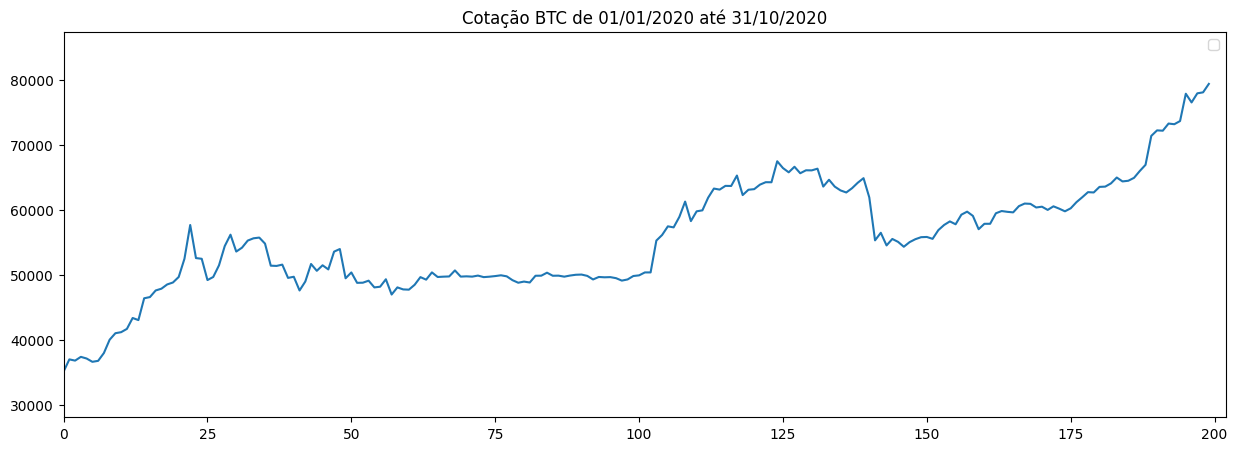

In [24]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.figure(figsize=(15, 5))
plt.title(f"Cotação {moeda} de {datetime.strptime(data_inicio, "%Y%m%d").strftime("%d/%m/%Y")} até {datetime.strptime(data_final, "%Y%m%d").strftime("%d/%m/%Y")}")
plt.legend('Cotação')
plt.plot(lista_cotacoes)
plt.axis([0, len(lista_cotacoes)*1.01, min(lista_cotacoes)*0.8, max(lista_cotacoes)*1.1])
plt.show()